In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\RGIPT\Documents\Classification\DATASET_ weka_679.csv")

In [3]:
#Data engineering
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SSA(m2/g)             558 non-null    float64
 1   Pore size(nm)         558 non-null    float64
 2   Pore Volume (cm3/g)   558 non-null    float64
 3   Potential             558 non-null    float64
 4   Nitrogen %            558 non-null    float64
 5   Id/Ig                 558 non-null    float64
 6   Specific Capacitance  558 non-null    float64
dtypes: float64(7)
memory usage: 30.6 KB


In [4]:
df['SSA(m2/g)'] = df['SSA(m2/g)']/1000

In [5]:
df = df.rename(columns={'SSA(m2/g)': 'SSA','Pore size(nm)': 'PS', 'Pore Volume (cm3/g)': 'PV' , 'Nitrogen %':'NC' ,  'Specific Capacitance':'SC'})

In [6]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

SSA          441
PS           177
PV           223
Potential     21
NC           129
Id/Ig        113
SC           330
dtype: int64

In [7]:
df.describe()

,SSA,PS,PV,Potential,NC,Id/Ig,SC
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,1.166802,1.714821,0.867994,1.296057,1.329385,0.555733,188.130824
std,0.883202,2.616503,0.861877,0.792527,2.875535,0.798127,104.478231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461500,0.000000,0.238000,1.000000,0.000000,0.000000,120.000000
50%,1.016700,0.900000,0.690000,1.000000,0.000000,0.000000,176.500000
75%,1.641000,2.522500,1.295000,1.000000,1.137500,0.997500,247.750000
max,4.073000,27.200000,5.910000,4.000000,19.800000,4.540000,587.000000


In [8]:
def assign_class(value):
    if value <= 138:
        return 1
    elif value <= 223:
        return 2
    else:
        return 3

df['Output_Class'] = df['SC'].apply(assign_class)
# Check the distribution of output classes
print("\nClass Distribution:")
print(df['Output_Class'].value_counts())


Class Distribution:
Output_Class
1    187
2    186
3    185
Name: count, dtype: int64


In [9]:
# split the data as df1,df2 and df3
df1 = df[df['Output_Class'] == 1]
df2 = df[df['Output_Class'] == 2]
df3 = df[df['Output_Class'] == 3]

In [10]:
#drop specific capacitance column for classification
# Drop column ''
dfop = df.drop(columns=['SC'])
#dfop = df.drop(columns=[df.columns[6]], inplace=True)
dfop.head()

,SSA,PS,PV,Potential,NC,Id/Ig,Output_Class
0,0.63,1.50,0.0,0.25,0.0,0.0,1
1,1.00,1.75,0.0,0.25,0.0,0.0,1
2,1.50,2.50,0.0,0.25,0.0,0.0,2
3,1.40,2.90,0.0,0.25,0.0,0.0,2
4,0.85,1.25,0.0,0.25,0.0,0.0,1


In [11]:
# Check Unique Values for each variable.
for i in dfop.columns:
  print(f"Unique {i}'s count:{dfop[i].nunique()}\n------------------------------------------")
  if i in dfop.columns:
    if(dfop[i].nunique() < 12):
      print(f"\n{dfop[i].unique()}\n------------------------------------------")

Unique SSA's count:441
------------------------------------------
Unique PS's count:177
------------------------------------------
Unique PV's count:223
------------------------------------------
Unique Potential's count:21
------------------------------------------
Unique NC's count:129
------------------------------------------
Unique Id/Ig's count:113
------------------------------------------
Unique Output_Class's count:3
------------------------------------------

[1 2 3]
------------------------------------------


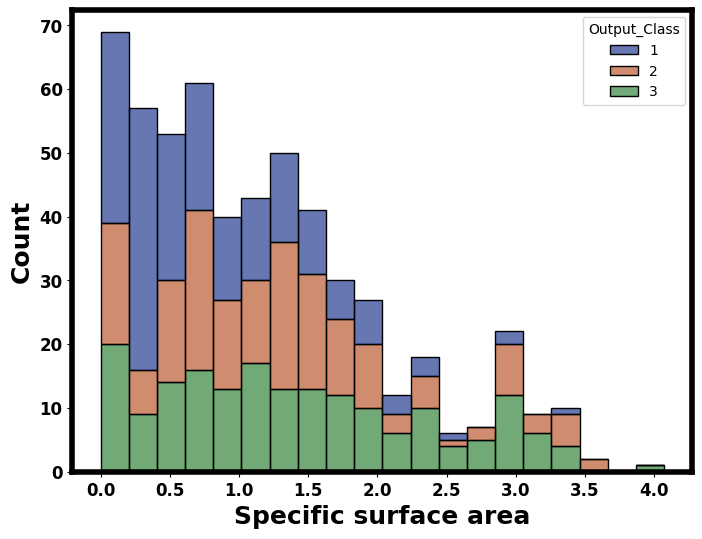

In [12]:
plt.figure(figsize=(8, 6))
# Exclude target column
sns.histplot(data=dfop, x="SSA", hue="Output_Class", bins=20, palette="dark", alpha=0.6, multiple="stack")
#plt.title(f"Histogram of SSA", fontsize=14, fontweight='bold')

#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers

# Making the title and labels bold

plt.xlabel("Specific surface area", fontweight="bold", fontsize=18)  # Bold x-axis label
plt.ylabel("Count", fontweight="bold", fontsize=18)  # Bold y-axis label
#plt.legend(title="Output_Class", title_fontsize=12, fontsize=10, frameon=True, edgecolor="black")

# Remove the grid
plt.grid(False)  

# Bold black outline for the figure
plt.gca().spines["top"].set_linewidth(4)   # Top border
plt.gca().spines["right"].set_linewidth(4) # Right border
plt.gca().spines["bottom"].set_linewidth(4) # Bottom border
plt.gca().spines["left"].set_linewidth(4)  # Left border

plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.show()

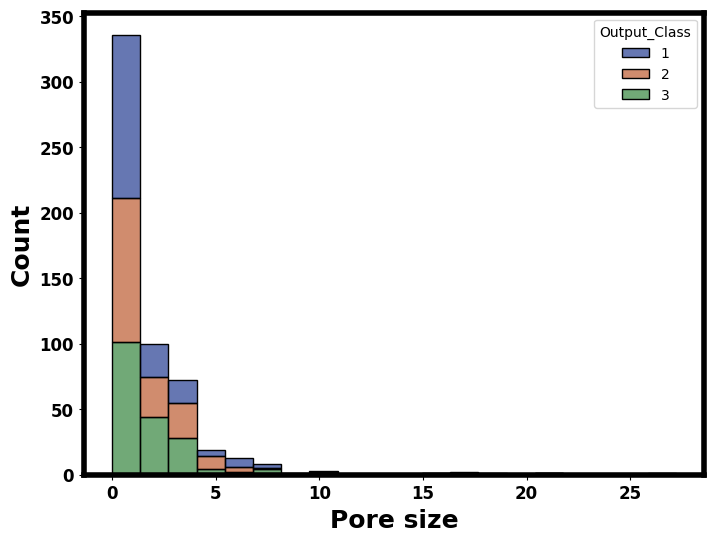

In [13]:
plt.figure(figsize=(8, 6))
# Exclude target column
sns.histplot(data=dfop, x="PS", hue="Output_Class", bins=20, palette="dark", alpha=0.6, multiple="stack")
#plt.title(f"Histogram of Pore size", fontsize=14, fontweight='bold')

#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers

# Making the title and labels bold

plt.xlabel("Pore size", fontweight="bold", fontsize=18)  # Bold x-axis label
plt.ylabel("Count", fontweight="bold", fontsize=18)  # Bold y-axis label
#plt.legend(title="Output_Class", title_fontsize=12, fontsize=10, frameon=True, edgecolor="black")

# Remove the grid
plt.grid(False)  

# Bold black outline for the figure
plt.gca().spines["top"].set_linewidth(4)   # Top border
plt.gca().spines["right"].set_linewidth(4) # Right border
plt.gca().spines["bottom"].set_linewidth(4) # Bottom border
plt.gca().spines["left"].set_linewidth(4)  # Left border

plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.show()

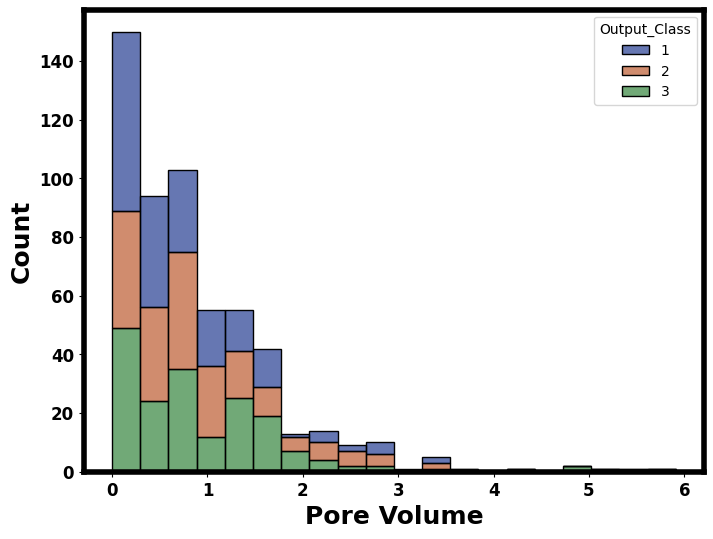

In [14]:
plt.figure(figsize=(8, 6))
# Exclude target column
sns.histplot(data=dfop, x="PV", hue="Output_Class", bins=20, palette="dark", alpha=0.6, multiple="stack")
#plt.title(f"Histogram of Pore Volume", fontsize=14, fontweight='bold')

#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers

# Making the title and labels bold

plt.xlabel("Pore Volume", fontweight="bold", fontsize=18)  # Bold x-axis label
plt.ylabel("Count", fontweight="bold", fontsize=18)  # Bold y-axis label
#plt.legend(title="Output_Class", title_fontsize=12, fontsize=10, frameon=True, edgecolor="black")

# Remove the grid
plt.grid(False)  

# Bold black outline for the figure
plt.gca().spines["top"].set_linewidth(4)   # Top border
plt.gca().spines["right"].set_linewidth(4) # Right border
plt.gca().spines["bottom"].set_linewidth(4) # Bottom border
plt.gca().spines["left"].set_linewidth(4)  # Left border

plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.show()

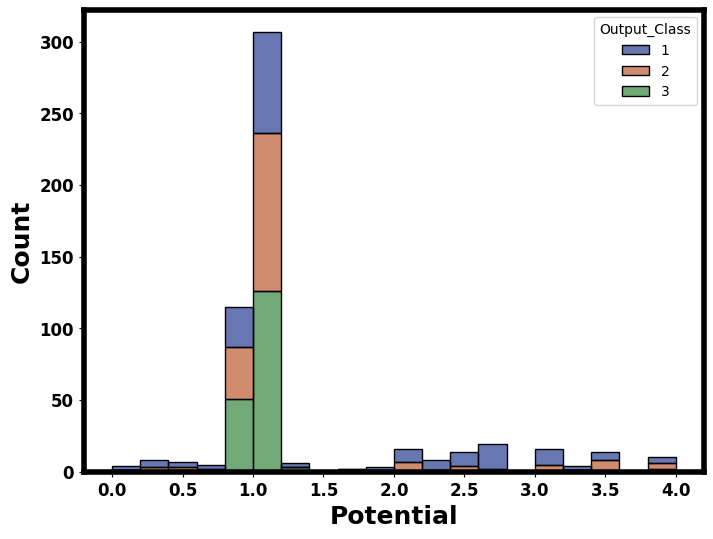

In [15]:
plt.figure(figsize=(8, 6))
# Exclude target column
sns.histplot(data=dfop, x="Potential", hue="Output_Class", bins=20, palette="dark", alpha=0.6, multiple="stack")
#plt.title(f"Histogram of Potential", fontsize=14, fontweight='bold')

#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers
# Making the title and labels bold

plt.xlabel("Potential", fontweight="bold", fontsize=18)  # Bold x-axis label
plt.ylabel("Count", fontweight="bold", fontsize=18)  # Bold y-axis label
#plt.legend(title="Output_Class", title_fontsize=12, fontsize=10, frameon=True, edgecolor="black")

# Remove the grid
plt.grid(False)  

# Bold black outline for the figure
plt.gca().spines["top"].set_linewidth(4)   # Top border
plt.gca().spines["right"].set_linewidth(4) # Right border
plt.gca().spines["bottom"].set_linewidth(4) # Bottom border
plt.gca().spines["left"].set_linewidth(4)  # Left border

plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.show()

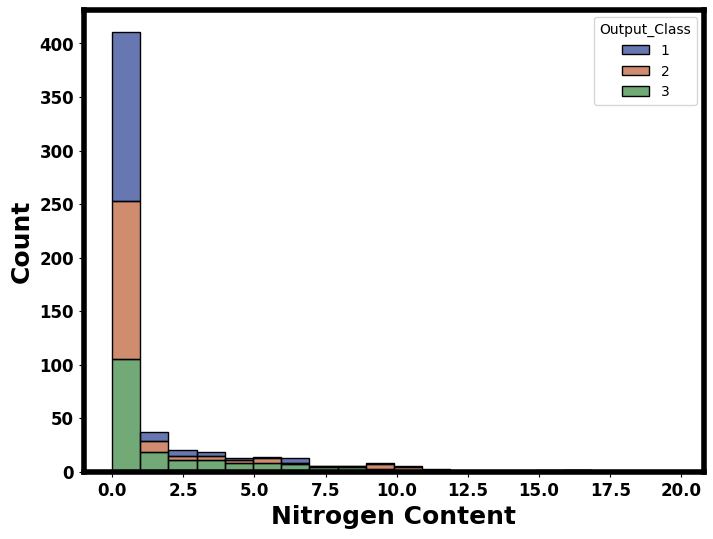

In [16]:
plt.figure(figsize=(8, 6))
# Exclude target column
sns.histplot(data=dfop, x="NC", hue="Output_Class", bins=20, palette="dark", alpha=0.6, multiple="stack")
#plt.title(f"Histogram of Nitrogen Content", fontsize=14, fontweight='bold')

#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers

# Making the title and labels bold

plt.xlabel("Nitrogen Content", fontweight="bold", fontsize=18)  # Bold x-axis label
plt.ylabel("Count", fontweight="bold", fontsize=18)  # Bold y-axis label
#plt.legend(title="Output_Class", title_fontsize=12, fontsize=10, frameon=True, edgecolor="black")

# Remove the grid
plt.grid(False)  

# Bold black outline for the figure
plt.gca().spines["top"].set_linewidth(4)   # Top border
plt.gca().spines["right"].set_linewidth(4) # Right border
plt.gca().spines["bottom"].set_linewidth(4) # Bottom border
plt.gca().spines["left"].set_linewidth(4)  # Left border

plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.show()

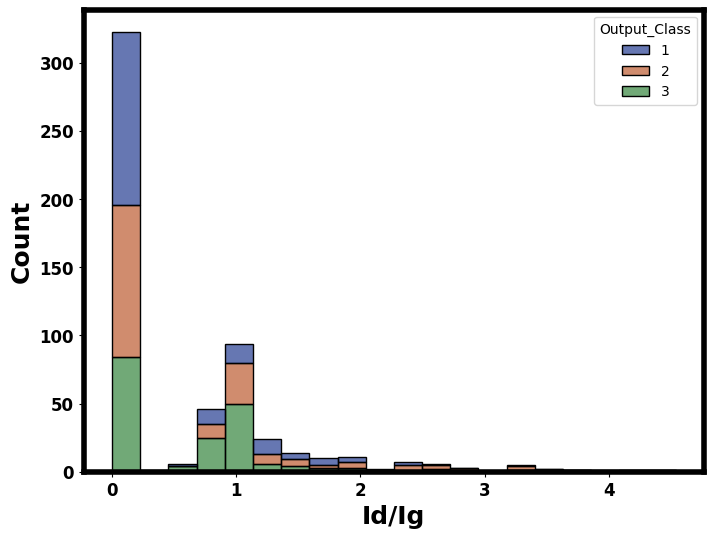

In [17]:
plt.figure(figsize=(8, 6))
# Exclude target column
sns.histplot(data=dfop, x="Id/Ig", hue="Output_Class", bins=20, palette="dark", alpha=0.6, multiple="stack")
#plt.title(f"Histogram of Id/Ig", fontsize=14, fontweight='bold')


#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers
# Making the title and labels bold

plt.xlabel("Id/Ig", fontweight="bold", fontsize=18)  # Bold x-axis label
plt.ylabel("Count", fontweight="bold", fontsize=18)  # Bold y-axis label
#plt.legend(title="Output_Class", title_fontsize=12, fontsize=10, frameon=True, edgecolor="black")

# Remove the grid
plt.grid(False)  

# Bold black outline for the figure
plt.gca().spines["top"].set_linewidth(4)   # Top border
plt.gca().spines["right"].set_linewidth(4) # Right border
plt.gca().spines["bottom"].set_linewidth(4) # Bottom border
plt.gca().spines["left"].set_linewidth(4)  # Left border

plt.gca().spines["top"].set_color("black")
plt.gca().spines["right"].set_color("black")
plt.gca().spines["bottom"].set_color("black")
plt.gca().spines["left"].set_color("black")
plt.show()

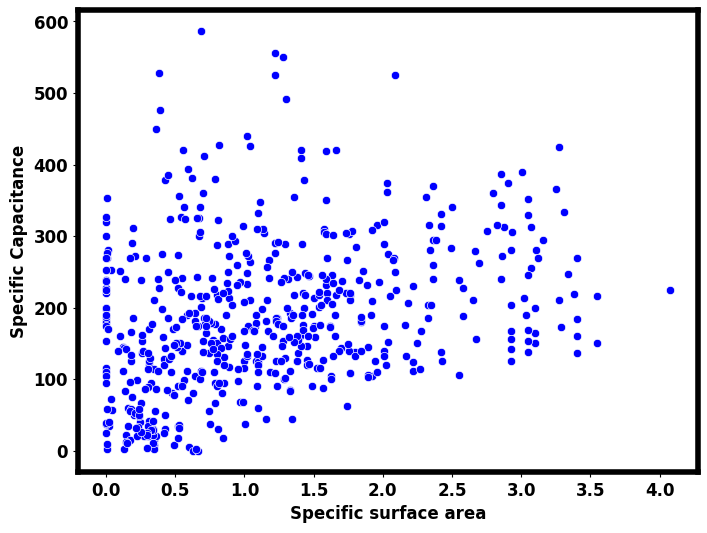

In [18]:
# Scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['SSA'], y=df['SC'], color='blue')
ax = plt.gca()  # Get current axis
for spine in ax.spines.values():
    spine.set_linewidth(4)  # Set border thickness
#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers
# Labels and title
plt.xlabel('Specific surface area', fontsize=12, fontweight='bold')
plt.ylabel('Specific Capacitance', fontsize=12, fontweight='bold')

# Show plot
plt.show()

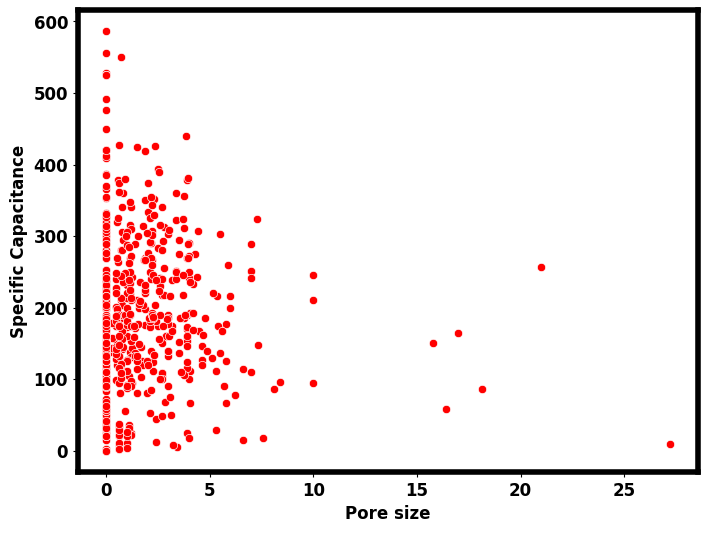

In [19]:
# Scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PS'], y=df['SC'], color='red')
ax = plt.gca()  # Get current axis
for spine in ax.spines.values():
    spine.set_linewidth(4)  # Set border thickness
#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers
# Labels and title
plt.xlabel('Pore size', fontsize=12, fontweight='bold')
plt.ylabel('Specific Capacitance', fontsize=12, fontweight='bold')
plt.show()

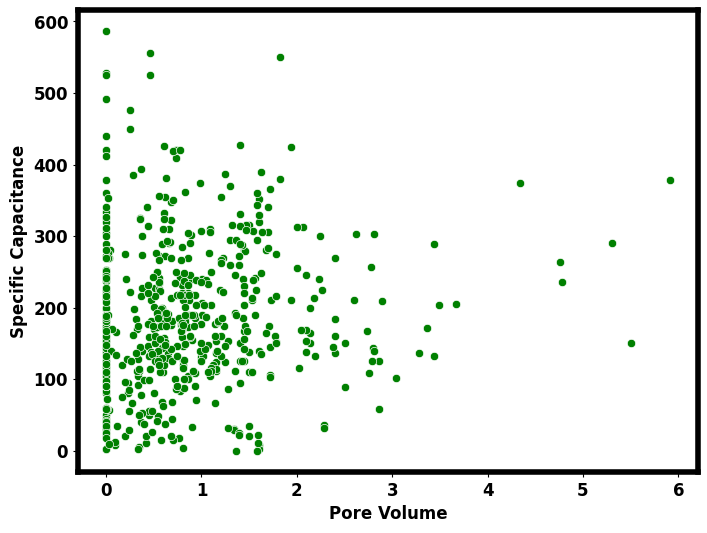

In [20]:
# Scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PV'], y=df['SC'], color='green')
ax = plt.gca()  # Get current axis
for spine in ax.spines.values():
    spine.set_linewidth(4)  # Set border thickness
#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers
# Labels and title
plt.xlabel('Pore Volume', fontsize=12, fontweight='bold')
plt.ylabel('Specific Capacitance', fontsize=12, fontweight='bold')
plt.show()

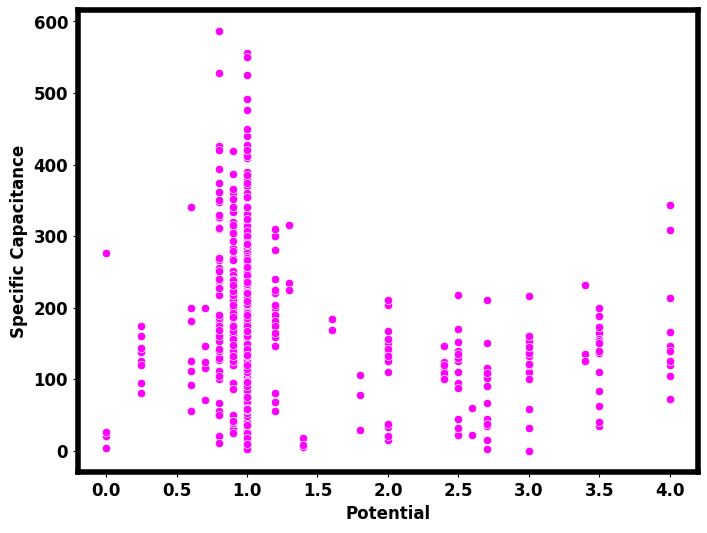

In [21]:
# Scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Potential'], y=df['SC'], color='magenta')
ax = plt.gca()  # Get current axis
for spine in ax.spines.values():
    spine.set_linewidth(4)  # Set border thickness
#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers
# Labels and title
plt.xlabel('Potential', fontsize=12, fontweight='bold')
plt.ylabel('Specific Capacitance', fontsize=12, fontweight='bold')
plt.show()

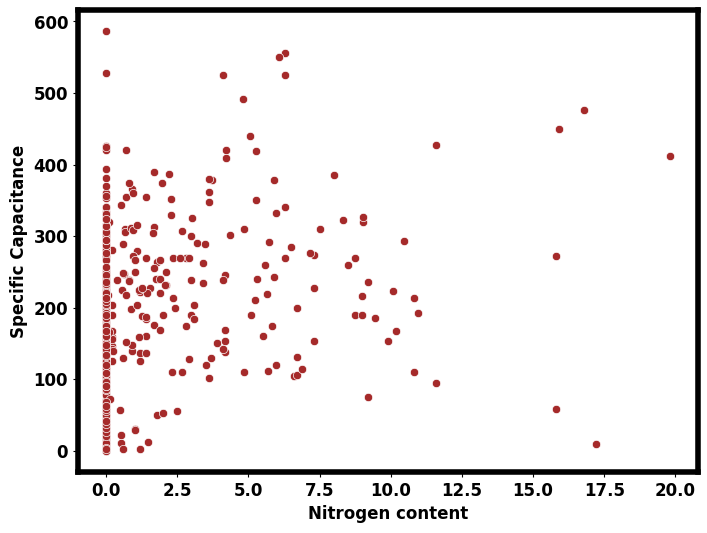

In [22]:
# Scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['NC'], y=df['SC'], color='brown')
ax = plt.gca()  # Get current axis
for spine in ax.spines.values():
    spine.set_linewidth(4)  # Set border thickness
#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers
# Labels and title
plt.xlabel('Nitrogen content', fontsize=12, fontweight='bold')
plt.ylabel('Specific Capacitance', fontsize=12, fontweight='bold')
plt.show()

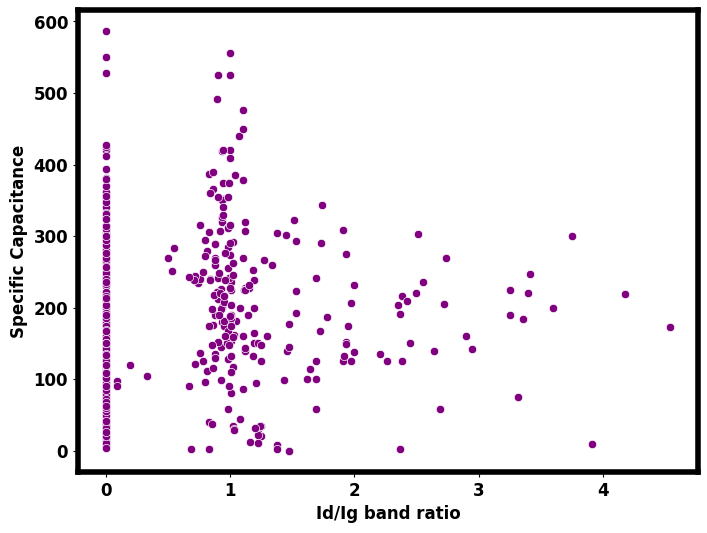

In [23]:
# Scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Id/Ig'], y=df['SC'], color='purple')
ax = plt.gca()  # Get current axis
for spine in ax.spines.values():
    spine.set_linewidth(4)  # Set border thickness
#Make x-axis and y-axis numbers bold
plt.xticks(fontsize=12, fontweight='bold')  # Bold x-axis numbers
plt.yticks(fontsize=12, fontweight='bold')  # Bold y-axis numbers
# Labels and title
plt.xlabel('Id/Ig band ratio', fontsize=12, fontweight='bold')
plt.ylabel('Specific Capacitance', fontsize=12, fontweight='bold')
plt.show()

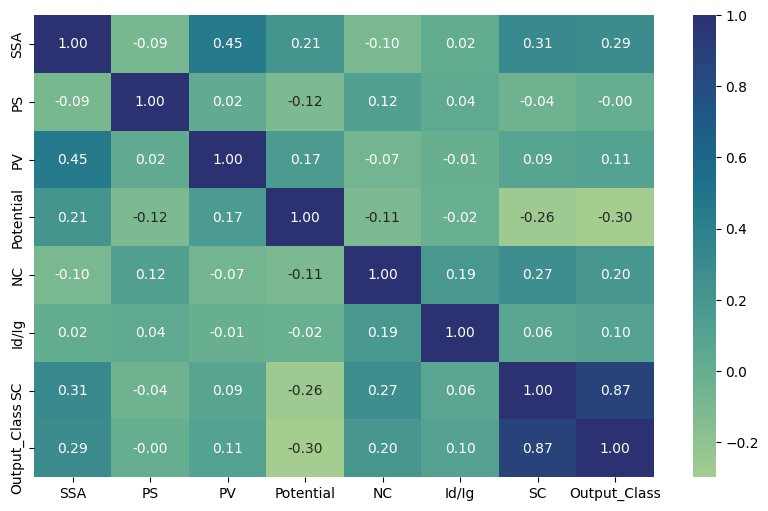

In [24]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="crest", fmt=".2f")
#plt.title("Feature Correlation Heatmap")
plt.show()

In [25]:
### classification models start

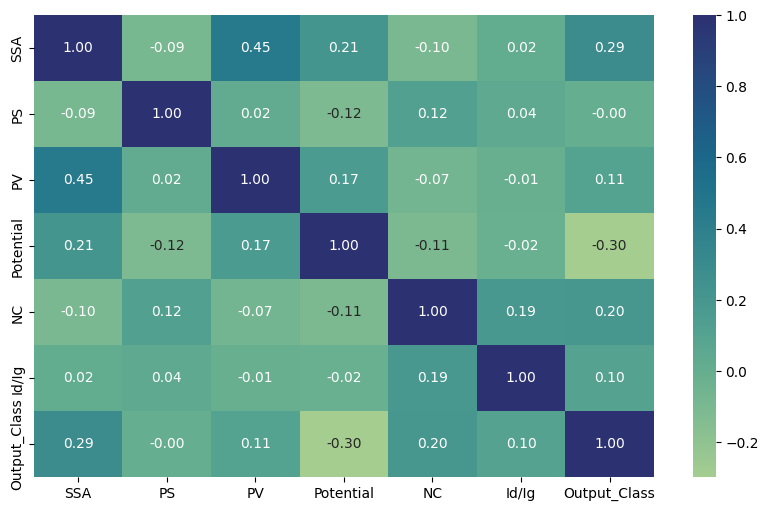

In [26]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dfop.corr(numeric_only=True), annot=True, cmap="crest", fmt=".2f")
#plt.title("Feature Correlation Heatmap")
plt.show()